In [17]:
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt

In [18]:
np.random.seed(42)

In [19]:
def generate_ancestors(t=10, sigma=20):
    ancestors = []
    time = 0
    while time <= t:
        x = np.random.exponential(1/sigma)
        ancestors.append(time)
        time += x


    return ancestors

In [20]:
def h(t, _lambda=0.1, _type='uni'):
    if _type == 'uni':
        return np.random.uniform(0, 20)  # uniform [0, 20]
    if _type == 'exp':
        return stats.expon.rvs(t, scale=1/_lambda)  # lambda*exp{-lambda*t}

In [21]:
def generate_taus(n, t, _lambda=0.1, _type='uni'):
    taus = []
    for i in range(n):
        taus.append(h(t, _lambda=_lambda, _type=_type))

    return taus

In [22]:
class Simulator:
    def __init__(self, n_runs, n_gen, h_type='uni'):
        self.n_runs = n_runs
        self.n_gen = n_gen

        self.m = 2
        self.h_type = h_type
        self.death_prob = 0.02

    def run_experiment(self, _type):
        ancestors = generate_ancestors()
        l = [ancestors]
        deaths = []
        infected = []

        for i in range(self.n_gen):
            death = np.random.random(size=len(l[i]))
            death = death[death < self.death_prob]
            deaths.append(len(death))

            nodes_i = []
            for parents_time in l[i]:
                infected.append(parents_time)

                rho = 1
                if parents_time > 20:
                    rho = .7

                n = stats.poisson.rvs(self.m * rho)  # generate children

                taus = generate_taus(n, parents_time, _type=_type)
                t_w = np.array(taus) + parents_time

                # not add childs above time threshold

                nodes_i.extend(t_w[t_w < self.n_gen])

            l.append(nodes_i)
            if len(nodes_i) == 0:  # exit if process is extinct
                break


        return l, infected, deaths

    def plot(self):
        pass

    def simulate(self, n_runs=1):

        res_uni = self.run_experiment(_type='uni')
        res_exp = self.run_experiment(_type='exp')

        return res_uni, res_exp

In [23]:
s = Simulator(1, 100)

In [25]:
res_uni, res_exp = s.simulate()

In [26]:
print(len(res_uni[0]))
print(len(res_exp[0]))

23
7


In [27]:
print(np.sum(res_uni[2]))
print(np.sum(res_exp[2]))

800
31


In [28]:
print(len(res_uni[1]))
print(len(res_exp[1]))

39417
2162


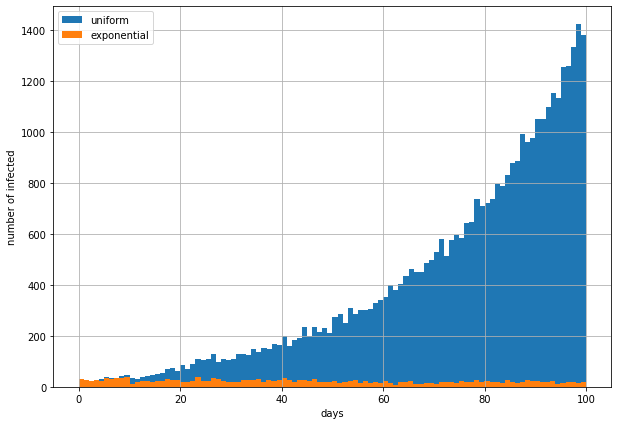

In [29]:
plt.figure(figsize=(10,7))
plt.hist(res_uni[1], bins=100, label='uniform')
plt.hist(res_exp[1], bins=100, label='exponential')

plt.xlabel("days")
plt.ylabel("number of infected")
plt.grid()
plt.legend()
plt.show()

In [30]:
l_u, arr2_u = np.histogram(res_uni[1], bins=100)
arr1_u = [0]
arr1_u.extend(l_u)

l_e, arr2_e = np.histogram(res_exp[1], bins=100)
arr1_e = [0]
arr1_e.extend(l_e)

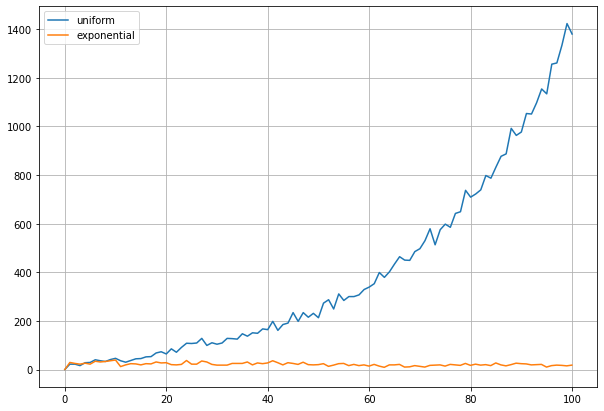

In [31]:
plt.figure(figsize=(10,7))

plt.plot(arr2_u, arr1_u, label="uniform")
plt.plot(arr2_e, arr1_e, label="exponential")

plt.legend()
plt.grid()
plt.show()

In [ ]:
# 659000 infected

In [ ]:
# per simulazione seconda parte cercare di tenere lambda fisso quando raggiunge un certo valore (rho = 2)
# mantenere rt = 1

In [ ]:
def sigma(t):
    if 0 <= t <= 10:
        return 20
    else:
        return 0

m = 2

In [ ]:
def intensity(Ts):

In [ ]:
def test(_lambda, T, m=2):
    Ts = []
    s = 0
    n = 0

    while s < T:
        _lambda_hat = intensity()

In [6]:
 def generate_seq(horizon, mu, alpha, omega, dim):
    '''Generate a sequence based on mu, alpha, omega values.
    Uses Ogata's thinning method, with some speedups, noted below'''

    data = []  # clear history

    Istar = np.sum(mu)
    s = np.random.exponential(scale=1./Istar)

    # attribute (weighted random sample, since sum(mu)==Istar)
    n0 = np.random.choice(np.arange(dim),
                          1,
                          p=(mu / Istar))
    data.append([s, n0])

    # value of \lambda(t_k) where k is most recent event
    # starts with just the base rate
    lastrates = mu.copy()

    decIstar = False
    while True:
        tj, uj = data[-1][0], int(data[-1][1])

        if decIstar:
            # if last event was rejected, decrease Istar
            Istar = np.sum(rates)
            decIstar = False
        else:
            # otherwise, we just had an event, so recalc Istar (inclusive of last event)
            Istar = np.sum(lastrates) + omega * np.sum(alpha[:,uj])

        # generate new event
        s += np.random.exponential(scale=1./Istar)

        # calc rates at time s (use trick to take advantage of rates at last event)
        rates = mu + np.exp(-omega * (s - tj)) * (alpha[:,uj].flatten() * omega + lastrates - mu)

        # attribution/rejection test
        # handle attribution and thinning in one step as weighted random sample
        diff = Istar - np.sum(rates)
        try:
            n0 = np.random.choice(np.arange(dim+1), 1,
                                  p=(np.append(rates, diff) / Istar))
        except ValueError:
            # by construction this should not happen
            print('Probabilities do not sum to one.')
            data = np.array(data)
            return data

        if n0 < dim:
            data.append([s, n0])
            # update lastrates
            lastrates = rates.copy()
        else:
            decIstar = True

        # if past horizon, done
        if s >= horizon:
            data = np.array(data)
            data = data[data[:,0] < horizon]
            return data

In [14]:
alpha=[[0.1]]
mu=[2]
omega=1.0

alpha, mu, omega = np.array(alpha), np.array(mu), omega
dim = mu.shape[0]

generate_seq(100, alpha=alpha, mu=mu, omega=omega, dim=dim)

C:\Users\david\AppData\Local\Temp\ipykernel_4252\3938764226.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)


array([[0.043136590968524256, array([0])],
       [0.35152810369724724, array([0])],
       [0.6783603179300973, array([0])],
       [0.7817526036333347, array([0])],
       [0.8730666200840395, array([0])],
       [1.0700432053740825, array([0])],
       [1.4132162118015819, array([0])],
       [1.6582636628305016, array([0])],
       [2.1232779443720253, array([0])],
       [2.4726405009322243, array([0])],
       [2.5798762859903026, array([0])],
       [2.6739954292521104, array([0])],
       [2.7490149397876236, array([0])],
       [2.885430257428244, array([0])],
       [3.283561231446055, array([0])],
       [3.571151130588637, array([0])],
       [4.525049865311283, array([0])],
       [4.820860476924101, array([0])],
       [5.189895838086588, array([0])],
       [5.447401315381586, array([0])],
       [5.715577530508283, array([0])],
       [7.909115292438953, array([0])],
       [8.209588951104898, array([0])],
       [8.27854978135436, array([0])],
       [8.621046156776641

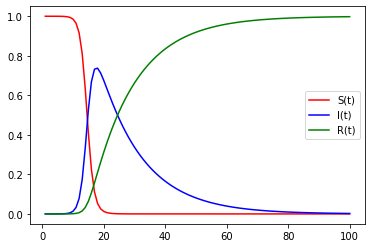

In [16]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# DEFINE CONSTANTS
a = 1 # infection rate
b = 1/14 # recovery rate

# FUNCTION TO RETURN DERIVATIVES AT T
def f(y,t):
    S, I, _ = y # get previous values of S, I, R and store them in array y
    d0 = -a*S*I # derivative of S(t)
    d1 = a*S*I - b*I # derivative of I(t)
    d2 = b*I # derivative of R(t)

    return [d0, d1, d2]

# INITIAL VALUES OF EACH FUNCTION
S_0 = 1
I_0 = 3.125/(10**6)
R_0 = 0
y_0 = [S_0,I_0,R_0]

t = np.linspace(start=1,stop=100,num=100)
y = odeint(f,y_0,t)

S = y[:,0]
I = y[:,1]
R = y[:,2]

plt.figure()
plt.plot(t,S,"r",label="S(t)")
plt.plot(t,I,'b',label="I(t)")
plt.plot(t,R,'g',label="R(t)")
plt.legend()
plt.show()